# Analysis of numpy.random Python Package
Author: David Maguire
***


***
## numpy.random

https://numpy.org/doc/stable/reference/random/index.html

[This earlier version](https://numpy.org/doc/1.16/reference/routines.random.html) has a better layout in my opinion although some function are not the same

The numpy random package is used to create pseudorandom elements. The term pseudorandom is used because computers cannot come up with truly random numbers without some sort of external factor. If that external factor is known, the "randomness" produced by the Random Number Generators (RNG) could be reproduced.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
from numpy.random import Generator, PCG64

In [2]:


rng = default_rng()

print(rng)
print(rng.random())

Generator(PCG64)
0.031065821092507107


In [3]:
# Newer Randomisation method
from numpy.random import Generator, PCG64, MT19937
rng = Generator(PCG64())
print(rng)

Generator(PCG64)


In [4]:
# Older randomisation method
rng = Generator(MT19937())
print(rng)

Generator(MT19937)


### Process for generating random array of numbers

<function matplotlib.pyplot.show(close=None, block=None)>

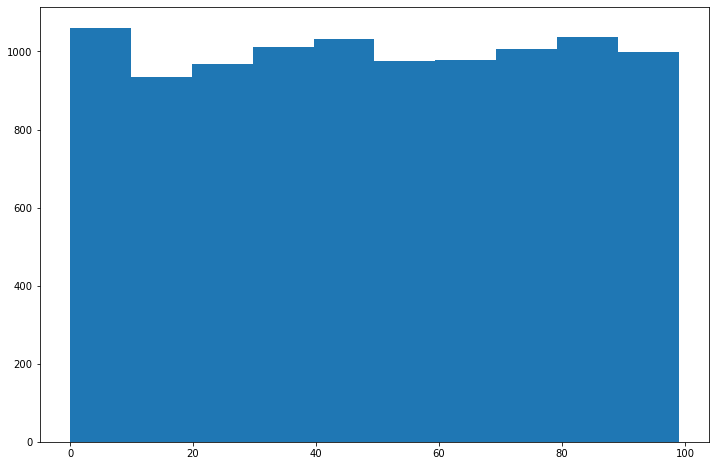

In [11]:
# Call default_rng to get a new instance of a generator
rng = default_rng()
rarray = rng.integers(0,100,10000)
# rarray
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(rarray)
plt.show

***
## Simple Random Data and Permutations

## Simple Random Data

## Permutations

***
## Distributions

### Uniform Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform

<function matplotlib.pyplot.show(close=None, block=None)>

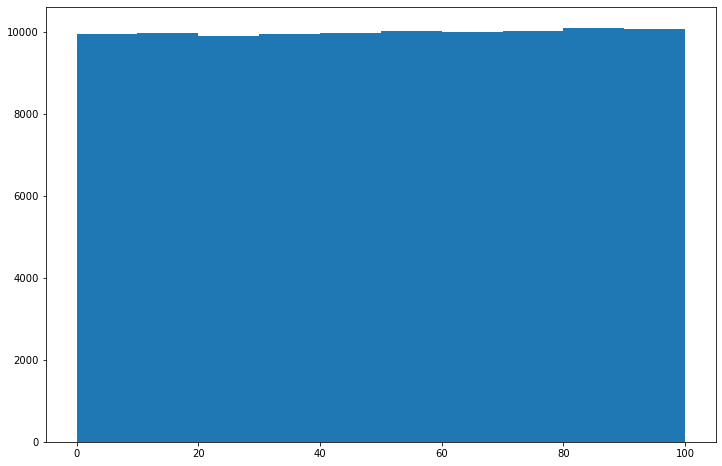

In [26]:
rng = np.random.default_rng()
rarray = rng.uniform(0,100,100000)
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(rarray)
plt.show

### Normal Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal

<function matplotlib.pyplot.show(close=None, block=None)>

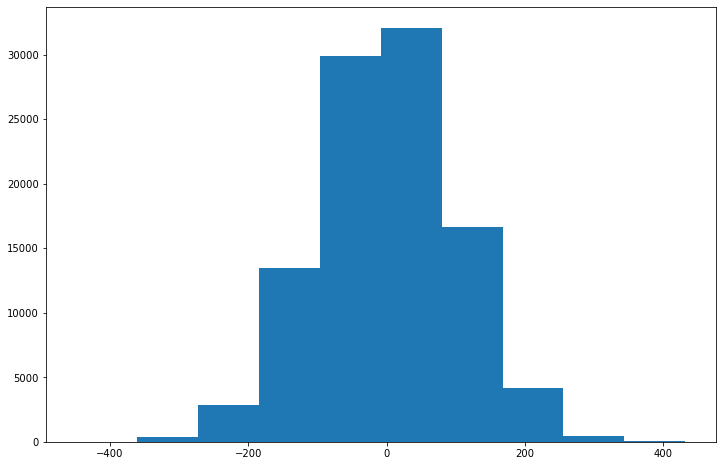

In [27]:
rng.normal(0,100,100000)
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(rarray)
plt.show

### Binomial Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

<function matplotlib.pyplot.show(close=None, block=None)>

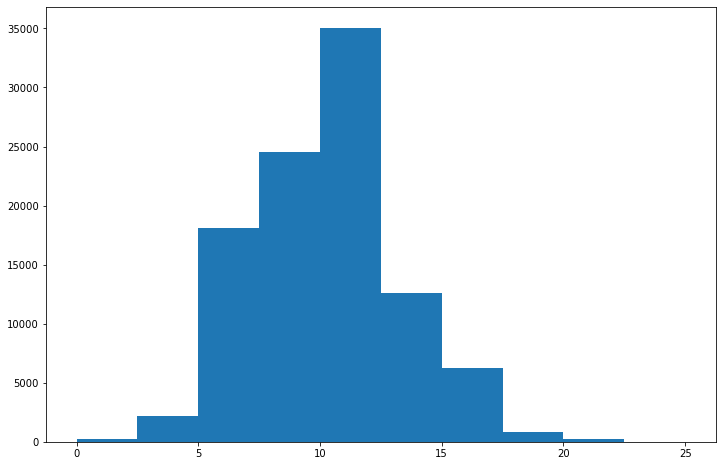

In [35]:
n , p = 100, 0.1
rarray = rng.binomial(n , p ,100000)
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(rarray)
plt.show

### Exponential Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential

<function matplotlib.pyplot.show(close=None, block=None)>

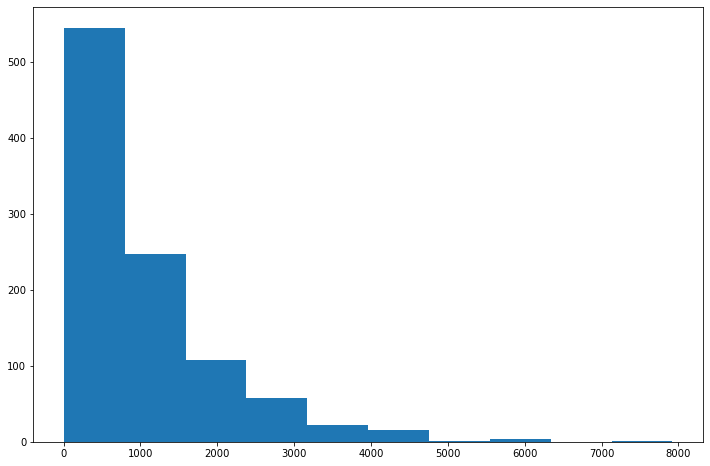

In [59]:
rarray = rng.exponential(size=1000, scale=1000)
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(rarray)
plt.show

### Gamma Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.gamma.html#numpy.random.Generator.gamma

***
## Seeds

***
## References

These will be tidyed up closer to the submission of the assignment:

-https://www.cs.hmc.edu/tr/hmc-cs-2014-0905.pdf bit generator paper

-https://www.pcg-random.org/ PCG number generators

-https://towardsdatascience.com/random-seed-numpy-786cf7876a5f Article on random numbers in numpy

-https://www.freecodecamp.org/news/random-number-generator/ Articla on Random Number Generators

-https://www.datacamp.com/community/tutorials/probability-distributions-python Random Distributions

-https://towardsdatascience.com/practical-guide-to-common-probability-distributions-in-machine-learning-487f6137625 More Random Distributions

***
# End